# DTDDB Session 20 assignment

This assignment is focused on classification and supervised learning.

## ☠ Please read the instructions carefully: ☠

>Your task is to complete this mandatory exercise, 
>
>then save the .ipynb file and upload it to https://eksamen.cbs.dk/
>
>The deadline is Monday the 22nd at 12:30
>
>Grading is pass OR fail
>
>You should answer all the questions by
>
> a) providing the correct Python code
>
> b) explaining (❗) the code you have written in your own words (either as markdown or comment)
>
> Answers that are not your own (plagiarised) will lead to an automatic fail
>
>You may work in groups but your submissions must be individual, i.e. you each have to provide a functioning .ipynb file with YOUR writing and explanation
>
>If you get stuck, move to the next question - perhaps it will help you solve an earlier one.
>
>☢ Read the instructions for each task carefully! ☢

## 0. Imports and setup

Import the following libraries (and others you might need) and name them appropriately: 

*import pandas as pd* 

*import matplotlib.pyplot as plt*

In [1]:
# Import your libraries here
import pandas as pd
import matplotlib.pyplot as plt


## 1. Data-Driven Treatment (20P)

You are the resident data scientist at a Danish hospital treating patients with a mysterious disease. While little is known about the causes of this illness, your team has been able to identify five drugs suitable for treating the condition based on their molecular structure. You have had good successes so far but you noticed that different patients respond to different medication. Rather than having to go through trial-and-error each time a new patient is admitted, your aim is to build a model based on the previously treated patients that predicts which class of medication is suitable for the newcomer. 

In [3]:
# Load the data (drugs.csv)
drugs = pd.read_csv('drugs.csv')


⮕ Your first task is to describe the data set available to you. Provide summary statistics and write at least one paragraph that includes information on which attributes your data set contains, what type of data they are and how they are distributed. Make sure you describe each column. Include graphics or statistics where appropriate.

In [13]:
# Your description goes here.
#I use the .head() method to get a overview of the atributtes of the dataframe. From this i can see that the dataframe
#contains the age, sex, blood presure (im guessing), cholesterol, Na a to K values aswell as what drug the model should assign
#The patients
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [12]:
#Then i use the .info() method to get a overview of the different data types in the data frame. I can see that the data frame
#contains two atributes that has numbers. Age ofcourse has to be a int since it can't have a decimal where the Na to K value
#Is a float since it can have decimals. We can also see that there are no null values through the entire data frame
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [16]:
#I use the .describe() method to have a look a the distribution of the numerical atributes. I can see that the youngest patient
#in the data frame is 15 years old, the average age is 44,315 and the oldest patient is 74 years old
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


🔺 / 4: 

⮕ Now that the descriptions are done, prepare the data for classification. The first step is to separate the predictors and the outcome. Store them as two variables named **predictors** and **outcomes**. Some of the attributes (including the optimal drugs) in your data are categorical and need to be transformed to numeric values for further analysis. Thankfully, **sklearn** has you covered: import **LabelEncoder** from **sklearn.preprocessing** to convert your values in the *sex*, *BP* and *Cholesterol* columns.

A useful introduction to *label encoding* [here](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).

In [30]:
# Your code goes here - do not forget to annotate it!
from sklearn.preprocessing import LabelEncoder

#I want my model to predict the right drug for my patients which is why i set outcome to be the collumn Drug
outcome = drugs['Drug']

#then i set my predictors to the remaining collumns 
predictors = drugs.iloc[:, 0:5]

#I make LabelEncoder shorter by creating a variable le to make it easier
le = LabelEncoder()

#I then use the LabelEncoder to transform the none numerical values in the dataframe into numbers
predictors.loc[:,"Sex"] = le.fit_transform(drugs["Sex"])
predictors.loc[:,"BP"] = le.fit_transform(drugs["BP"])
predictors.loc[:,"Cholesterol"] = le.fit_transform(drugs["Cholesterol"])

# The general principle is:
# create a new LabelEncoder() and assign it to an object
# use the .fit_transform(...) function to encode your categorical columns

In [71]:
#I use the .head() method to print the first five collumns of my predictiors dataframe to chek if the values has been changed
predictors.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


🔺 / 3:

⮕ Excellent! The next step is to split your data set into training and testing samples. Again, **sklearn** has some useful tricks up it's sleeve. Import [**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from **sklearn.model_selection**. Chose sensible values for your two samples and split the data, assigning the two samples to variables with expressive names. Document your process so it can be audited later on.

The syntax for the command is pretty simple:

*predictor-train, predictor-test, outcome-train, outcome-test = train_test_split(train, test, test_size=..., random_state=500)* (Set the random state to ensure reproducible results.)

If you have difficulties check out the documentation linked above.

In [87]:
from sklearn.model_selection import train_test_split
# Your code + documentation go here

#I use the traint_test_split method as described in the text above. i use my predictors and outcome df in the () as these are
#the df's i want to be split in to testing and training smaples
predictors_train, predictors_test, outcome_train, outcome_test = train_test_split(predictors, outcome, test_size=0.33, random_state=500)

#Then use the .shape to have the program print out how many collumns and rows each sample contains to se if it made the right
#Split
print(predictors_train.shape, outcome_train.shape, predictors_test.shape, outcome_test.shape)

(134, 5) (134,) (66, 5) (66,)


🔺 / 3:

⮕ Phenomenal, we're ready to build our model. Import **DecisionTreeClassifier** from **sklearn.tree** and fit the model to your training data set. Chose *entropy* as the ciriterion for information gain and a maximum depth of *3*.

In [90]:
from sklearn.tree import DecisionTreeClassifier

#i use DecisionTreeClassifier to create my model and call it clf for classified
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

#Then i fit my model by using the training samples for predictions and outcomes. This trains my model
clf.fit(predictors_train, outcome_train)

# Code and annotation hereclf


DecisionTreeClassifier(criterion='entropy', max_depth=3)

🔺 / 2:

⮕ Now evaluate how well it predicts your hold-out data. You can import **metrics** from **sklearn** to calculate the accuracy using *.accuracy_score()*. Please describe your findings for a non-technical audience.

In [92]:
from sklearn import metrics
#Then i make a test model called clf_t with the test sample. I then mesure the accuracy with the accuracy_score tool from
#sklearn by comparing it to the outcome_test data sample.
clf_t = clf.predict(predictors_test)

#The score comes out at 0.89 which would imply that the moddel is very accurate

metrics.accuracy_score(clf_t, outcome_test)


0.8939393939393939

🔺 / 2:

⮕ Let us visualise our model for better understanding. From **sklearn** import **tree** to access the .plot_tree() function. Use *fig = plt.figure(figsize=(25,20))* to set up a readable graphic.

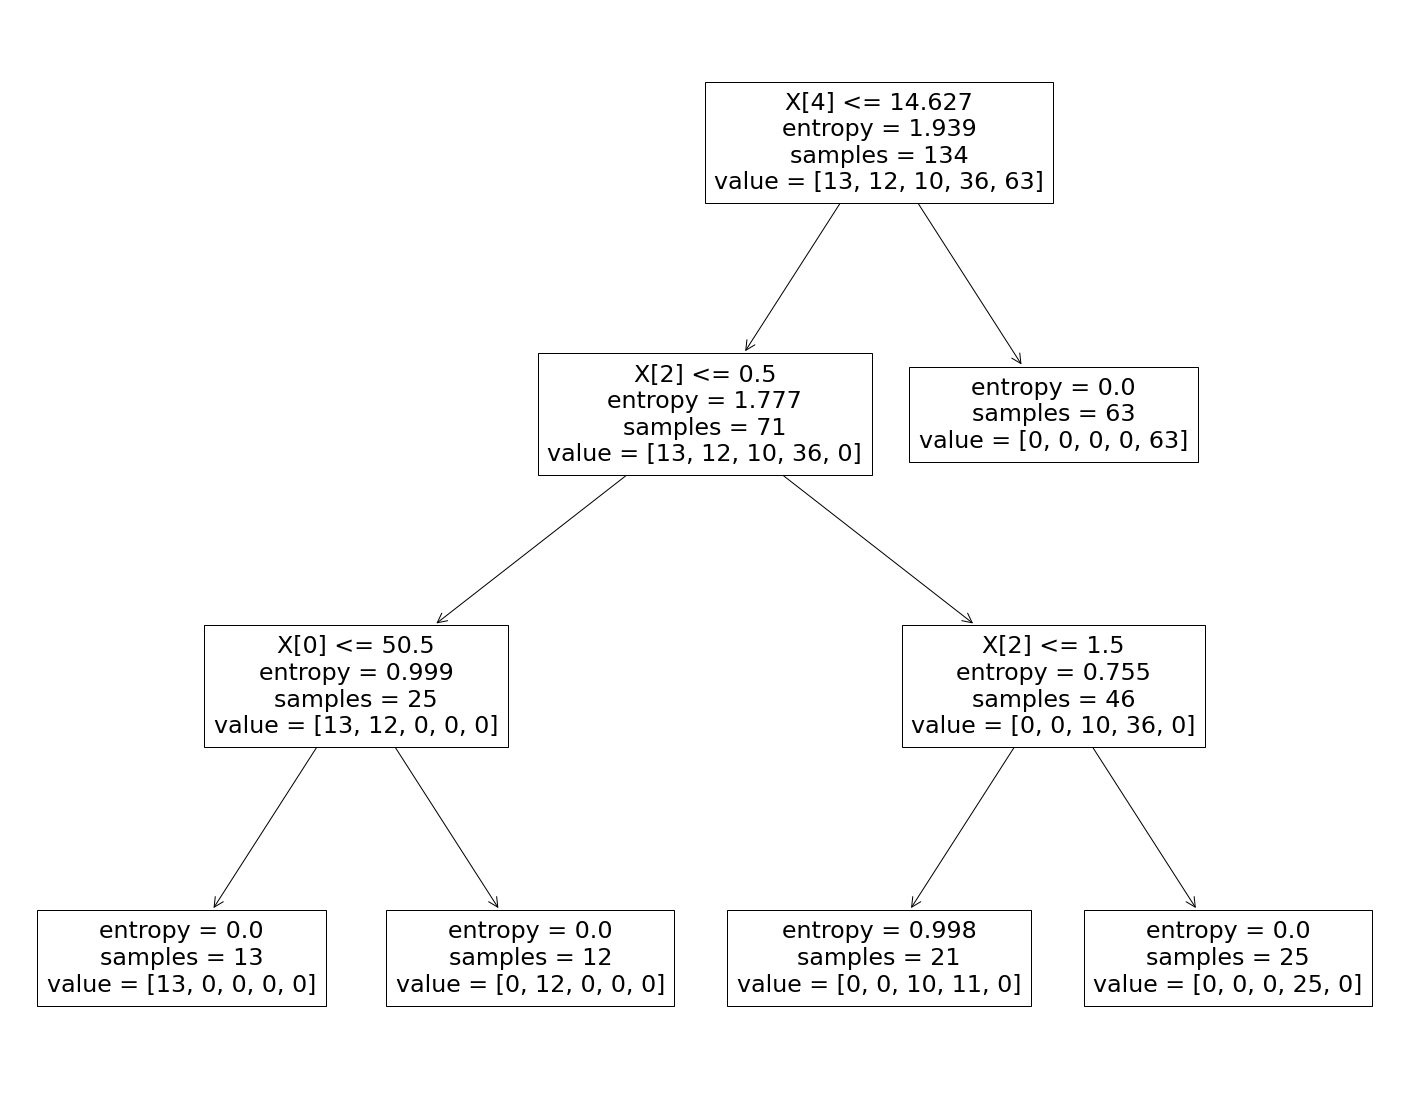

In [91]:
# Write your code and annotation here.
#First i import the tree tool from sklearn
from sklearn import tree

#I copy and past the code from the task discribtion to get a desicion tree that fits the format of this notebook
fig = plt.figure(figsize=(25,20))

#Then i create i vizualization in the form of a decision tree of the model i have created by using the tree.plot_tree tool from
#sklearn and in the () i type the name of my model
tree.plot_tree(clf)

#i type plt.show to avoid the anoying text that shows up otherwise
plt.show()



🔺 / 3:

⮕ Finally, the following code extracts the most important features for your model from the data. Fill the gaps in the code and then create a bar plot to view the most important featurs. Discuss what your findings are. Is this a suitable model? What were you able to learn using classification?

Text(0.5, 1.0, 'Feature importance')

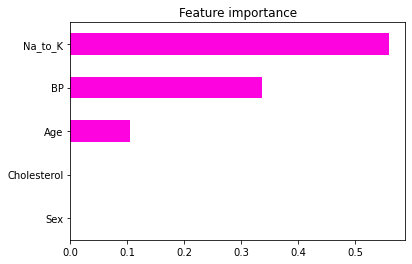

In [96]:
# This code is almost complete
#I add the name of my model to the code given by the task to have the code create a model that shows what atributes of the 
#model created in this assignment. 
feature_importance = pd.Series(clf.feature_importances_,index = predictors_train.columns)
feature_importance = feature_importance.sort_values()
plt.figure()

# Visualise as a bar plot (your code):
# I type the name of the model calculating the importance of feature followed by .plot() and then add the type of vizulazation
# i want to be shown as well as the color i want the bar plot to bee
feature_importance.plot(kind= 'barh', color = '#fc03df')

#I also gives the bar plot a title
plt.title('Feature importance')

In [ ]:
"""The most interesting findig is how much the model suggest the Na to K ballance influence what drug a patient should be
assigned. It is very suprising to me that the model suggests that age has little to do with the type of drug a patient
should be assigned. I also se a problem with the data used to create the model as there is no option (at least as far as i
can see) for no drug to be assigned. I also se a problem in using data where two of the atributes has no importance at all in 
order to figure out what drug a patient should be assigned.

However, the model does look acurate and given that we are working within medicin (a very hard form of sience) is an accuracy
score of 0.89 a decend level of accuracy. On the other side i would rather have an accuracy score of 1 if the model were
supposed to assign me a drug to better my overal health."""

🔺 / 3:

🔺 / 20: